In [ ]:

!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sklearn

from google.colab import drive

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib as mpl
import matplotlib.pyplot as plt

import shap
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIDA/DADS6003 ML/Smartphone.csv')
print(df.info())
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Timestamp                                                        69 non-null     object
 1   เพศของผู้ตอบแบบสอบถาม                                            69 non-null     object
 2   ช่วงอายุของผู้ตอบแบบสอบถาม                                       69 non-null     object
 3   อาชีพของผู้ตอบแบบสอบถาม                                          69 non-null     object
 4   ช่วงเงินเดือนของผู้ตอบแบบสอบถาม                                  69 non-null     object
 5   ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด                         69 non-null     object
 6   ท่านใช้สมาร์ทโฟนในก

,Timestamp,เพศของผู้ตอบแบบสอบถาม,ช่วงอายุของผู้ตอบแบบสอบถาม,อาชีพของผู้ตอบแบบสอบถาม,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง],ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ],หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด,จากข้อที่แล้ว เนื่องจากสาเหตุใด
0,1/13/2024 14:41:25,หญิง,21-25 ปี,เอกชน,"40,001-50,000 บาท",IOS,บ่อยครั้ง,บ่อยที่สุด,ปานกลาง,ค่อนข้างน้อย,Iphone,ดูรวยดีย์
1,1/13/2024 15:01:08,ชาย,26-30 ปี,เอกชน,"30,001-40,000 บาท",IOS,ค่อนข้างน้อย,บ่อยที่สุด,ปานกลาง,ปานกลาง,Iphone,ความเสถียร
2,1/13/2024 15:01:44,ชาย,31-35 ปี,เอกชน,"40,001-50,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,คุ้นเคยกับ Brand เดิม
3,1/13/2024 15:01:48,ชาย,21-25 ปี,เอกชน,"30,001-40,000 บาท",IOS,น้อยที่สุด,ปานกลาง,ปานกลาง,น้อยที่สุด,Iphone,ง่ายต่อการใช้งาน
4,1/13/2024 15:01:49,ชาย,21-25 ปี,ว่างงาน,"น้อยกว่า 20,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ค่อนข้างน้อย,ค่อนข้างน้อย,Iphone,ดี ทน
...,...,...,...,...,...,...,...,...,...,...,...,...
64,8/17/2024 15:07:39,หญิง,26-30 ปี,เอกชน,"30,001-40,000 บาท",Android,ปานกลาง,บ่อยที่สุด,ค่อนข้างน้อย,บ่อยครั้ง,Google,เป็นแบรนด์ที่น่าสนใจ
65,8/17/2024 15:08:53,ชาย,31-35 ปี,เอกชน,"มากกว่า 60,000 บาท",IOS,ปานกลาง,บ่อยครั้ง,ปานกลาง,ปานกลาง,Iphone,เพราะรู้สึกยุ่งยากในการย้ายข้อมูลส่วนตัว เเละ ...
66,8/17/2024 15:09:15,หญิง,21-25 ปี,นักศึกษา,"น้อยกว่า 20,000 บาท",Android,น้อยที่สุด,บ่อยที่สุด,บ่อยครั้ง,ปานกลาง,Samsung,ฟังก์ชั่นใหม่น่าใช้ และคุ้นเคยที่สุด
67,8/17/2024 15:24:35,ชาย,26-30 ปี,เอกชน,"40,001-50,000 บาท",IOS,ค่อนข้างน้อย,บ่อยครั้ง,ปานกลาง,บ่อยที่สุด,Iphone,Ecosystem ดี


In [ ]:
df1= df[['เพศของผู้ตอบแบบสอบถาม','อาชีพของผู้ตอบแบบสอบถาม','ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]',
        'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]','หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด','ช่วงเงินเดือนของผู้ตอบแบบสอบถาม']]

'''df1= df[['เพศของผู้ตอบแบบสอบถาม','อาชีพของผู้ตอบแบบสอบถาม','ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]',
        'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]','หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด','ช่วงอายุของผู้ตอบแบบสอบถาม','ช่วงเงินเดือนของผู้ตอบแบบสอบถาม']'''

onehot_lst = ['เพศของผู้ตอบแบบสอบถาม','อาชีพของผู้ตอบแบบสอบถาม','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นเกม]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [เล่นโซเชี่ยลมีเดีย]',
              'ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ดูหนัง ฟังเพลง]','ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]','หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด']



label_lst = ['ช่วงเงินเดือนของผู้ตอบแบบสอบถาม']
#label_lst = ['ช่วงอายุของผู้ตอบแบบสอบถาม','ช่วงเงินเดือนของผู้ตอบแบบสอบถาม']

#ใช้ LabelEncoder วนลูป label_lst ทีละคอลัมน์
label_encoder = LabelEncoder()
for col in label_lst:
    df1[col] = label_encoder.fit_transform(df1[col])

# ใช้ OneHotEncoder สำหรับคอลัมน์ใน onehot_lst
onehot_encoded_df = pd.get_dummies(df1[onehot_lst], prefix = onehot_lst)

df1 = df1.drop(columns=onehot_lst)

df1 = pd.concat([df1, onehot_encoded_df], axis=1)

display(df1)


,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,เพศของผู้ตอบแบบสอบถาม_ชาย,เพศของผู้ตอบแบบสอบถาม_หญิง,อาชีพของผู้ตอบแบบสอบถาม_Freelancer,อาชีพของผู้ตอบแบบสอบถาม_ข้าราชการ,อาชีพของผู้ตอบแบบสอบถาม_นักศึกษา,อาชีพของผู้ตอบแบบสอบถาม_รัฐวิสาหกิจ,อาชีพของผู้ตอบแบบสอบถาม_ว่างงาน,อาชีพของผู้ตอบแบบสอบถาม_เอกชน,...,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยครั้ง,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยที่สุด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_ปานกลาง,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Google,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Iphone,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Nokia,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oneplus,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oppo,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Samsung,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_ยังไม่รู้
0,IOS,2,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,IOS,1,True,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,IOS,2,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
3,IOS,1,True,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,IOS,4,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Android,1,False,True,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
65,IOS,5,True,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
66,Android,4,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
67,IOS,2,True,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
df1['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด'].value_counts()

,count
ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,
IOS,55
Android,14


In [ ]:

df1  = df1.replace({'IOS': 1, 'Android': 0,True: 1, False: 0})
display(df1)

,ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด,ช่วงเงินเดือนของผู้ตอบแบบสอบถาม,เพศของผู้ตอบแบบสอบถาม_ชาย,เพศของผู้ตอบแบบสอบถาม_หญิง,อาชีพของผู้ตอบแบบสอบถาม_Freelancer,อาชีพของผู้ตอบแบบสอบถาม_ข้าราชการ,อาชีพของผู้ตอบแบบสอบถาม_นักศึกษา,อาชีพของผู้ตอบแบบสอบถาม_รัฐวิสาหกิจ,อาชีพของผู้ตอบแบบสอบถาม_ว่างงาน,อาชีพของผู้ตอบแบบสอบถาม_เอกชน,...,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยครั้ง,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_บ่อยที่สุด,ท่านใช้สมาร์ทโฟนในการทำอะไรมากที่สุด [ถ่ายรูป ถ่ายวิดีโอ]_ปานกลาง,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Google,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Iphone,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Nokia,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oneplus,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Oppo,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_Samsung,หากท่านซื้อสมาร์ทโฟนเครื่องใหม่ จะใช้เลือกซื้อสมาร์ทโฟนแบรนด์ใด_ยังไม่รู้
0,1,2,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,1,2,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,4,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,1,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
65,1,5,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
66,0,4,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
67,1,2,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Select features (X) ยกเว้น ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด
X = df1.drop('ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด', axis=1)
# Select target (y)
y = df1['ปัจจุบันท่านใช้สมาร์ทโฟนระบบปฎิบัติการใด']

# train /testing split (70% / 30% )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# Create a logistic regression model
logistic = LogisticRegression()

# Train the model
logistic.fit(X_train, y_train)

# Test the model
accuracy = logistic.score(X_test, y_test)

print(f'accuracy: {accuracy}')

accuracy: 0.7619047619047619


In [ ]:
import matplotlib
import matplotlib.font_manager as fm

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# Use addfont instead of createFontList
fm.fontManager.addfont('thsarabunnew-webfont.ttf')
matplotlib.rc('font', family='TH Sarabun New')

--2024-09-12 05:49:48--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-09-12 05:49:48--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.4’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2024-09-12 05:49:48 (4.09 MB/s) - 

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.75      1.00      0.86        15

    accuracy                           0.76        21
   macro avg       0.88      0.58      0.57        21
weighted avg       0.82      0.76      0.69        21



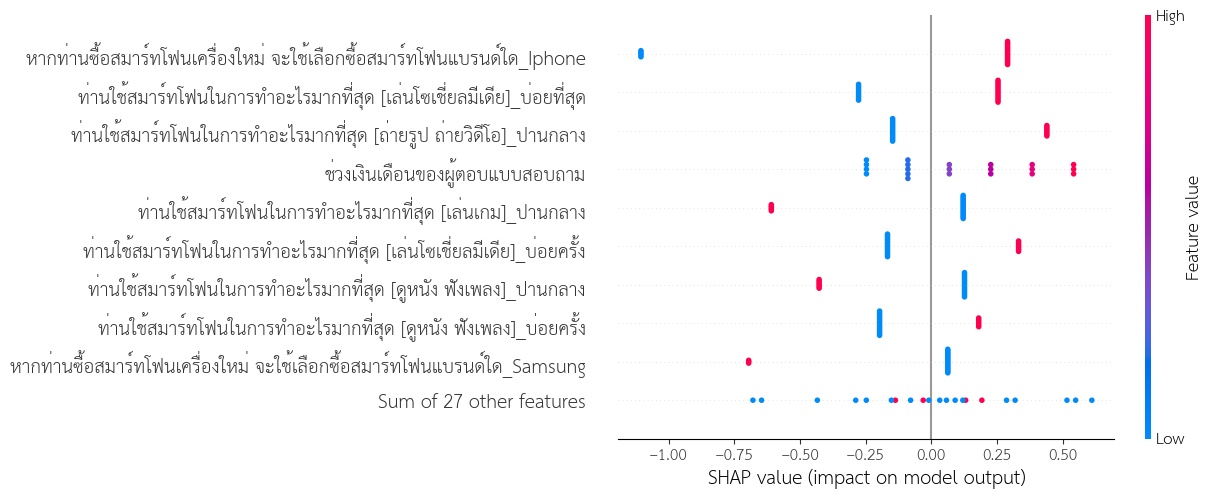

<module 'shap.plots' from '/usr/local/lib/python3.10/dist-packages/shap/plots/__init__.py'>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


print(classification_report(y_test, logistic.predict(X_test)))

explainer = shap.Explainer(logistic, X_train, feature_names=df1.columns.tolist())
shap_values = explainer(X_test)


shap.plots.initjs()
shap.plots.beeswarm(shap_values)
shap.plots

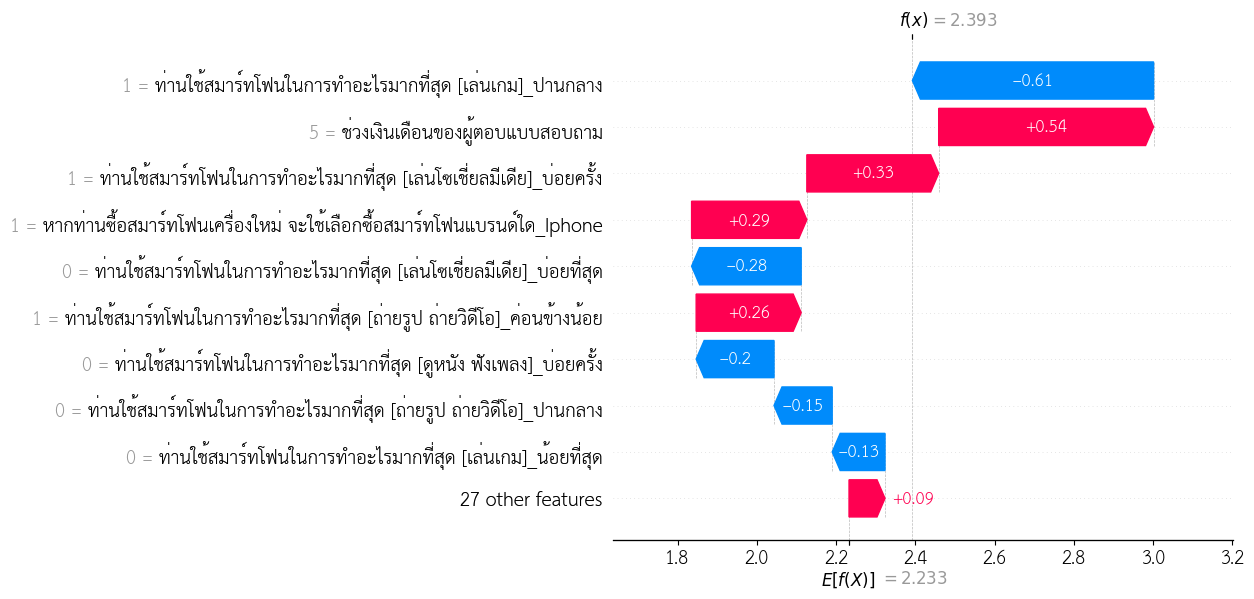

In [ ]:
 shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values

.values =
array([[ 5.42228919e-01, -4.18152091e-02, -4.18148555e-02,
        -4.98343744e-04,  1.23049848e-02,  1.57093730e-02,
        -1.33811129e-02,  0.00000000e+00, -9.07907031e-03,
        -9.00252928e-02, -1.33288598e-01, -2.31854551e-02,
         1.18318632e-02, -6.08592130e-01,  3.16130355e-02,
         5.42896813e-03,  3.32672244e-01, -2.76493267e-01,
         8.81076963e-04, -1.40096912e-02,  5.42896813e-03,
        -1.96465834e-01, -7.52870864e-02,  1.26821655e-01,
         2.64994857e-01,  6.63271311e-02,  2.18635184e-02,
         1.86089449e-02, -1.46762233e-01,  5.42896813e-03,
         2.90775006e-01, -7.32313104e-03,  1.32748558e-02,
         1.11904533e-02,  6.31602021e-02, -2.64625138e-03],
       [ 2.26750275e-01,  5.37624117e-02,  5.37619571e-02,
        -4.98343744e-04,  1.23049848e-02,  1.57093730e-02,
        -1.33811129e-02,  0.00000000e+00, -9.07907031e-03,
        -9.00252928e-02,  1.22625510e-01, -2.31854551e-02,
         1.18318632e-02,  1.21718426e-01,  3.

In [ ]:
#random test sample
shap_values[0]

.values =
array([ 5.42228919e-01, -4.18152091e-02, -4.18148555e-02, -4.98343744e-04,
        1.23049848e-02,  1.57093730e-02, -1.33811129e-02,  0.00000000e+00,
       -9.07907031e-03, -9.00252928e-02, -1.33288598e-01, -2.31854551e-02,
        1.18318632e-02, -6.08592130e-01,  3.16130355e-02,  5.42896813e-03,
        3.32672244e-01, -2.76493267e-01,  8.81076963e-04, -1.40096912e-02,
        5.42896813e-03, -1.96465834e-01, -7.52870864e-02,  1.26821655e-01,
        2.64994857e-01,  6.63271311e-02,  2.18635184e-02,  1.86089449e-02,
       -1.46762233e-01,  5.42896813e-03,  2.90775006e-01, -7.32313104e-03,
        1.32748558e-02,  1.11904533e-02,  6.31602021e-02, -2.64625138e-03])

.base_values =
2.232746094160465

.data =
array([5, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#random test sample
shap_values[1]

.values =
array([ 2.26750275e-01,  5.37624117e-02,  5.37619571e-02, -4.98343744e-04,
        1.23049848e-02,  1.57093730e-02, -1.33811129e-02,  0.00000000e+00,
       -9.07907031e-03, -9.00252928e-02,  1.22625510e-01, -2.31854551e-02,
        1.18318632e-02,  1.21718426e-01,  3.16130355e-02,  5.42896813e-03,
       -1.66336122e-01,  2.54373806e-01,  8.81076963e-04,  9.33979413e-04,
        5.42896813e-03,  1.80748567e-01, -7.52870864e-02,  1.26821655e-01,
       -6.97354886e-02,  6.63271311e-02,  2.18635184e-02,  1.86089449e-02,
        4.40286699e-01,  5.42896813e-03, -1.10494502e+00, -7.32313104e-03,
        1.32748558e-02,  1.11904533e-02,  6.31602021e-02,  1.24373815e-01])

.base_values =
2.232746094160465

.data =
array([3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

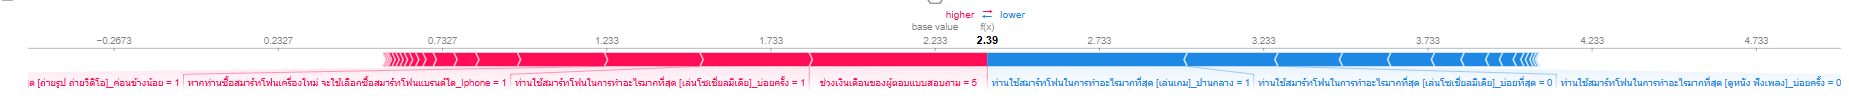

In [ ]:
shap.initjs()
shap.plots.force(shap_values[1])

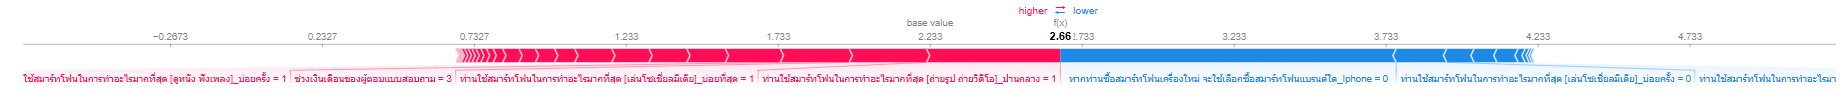

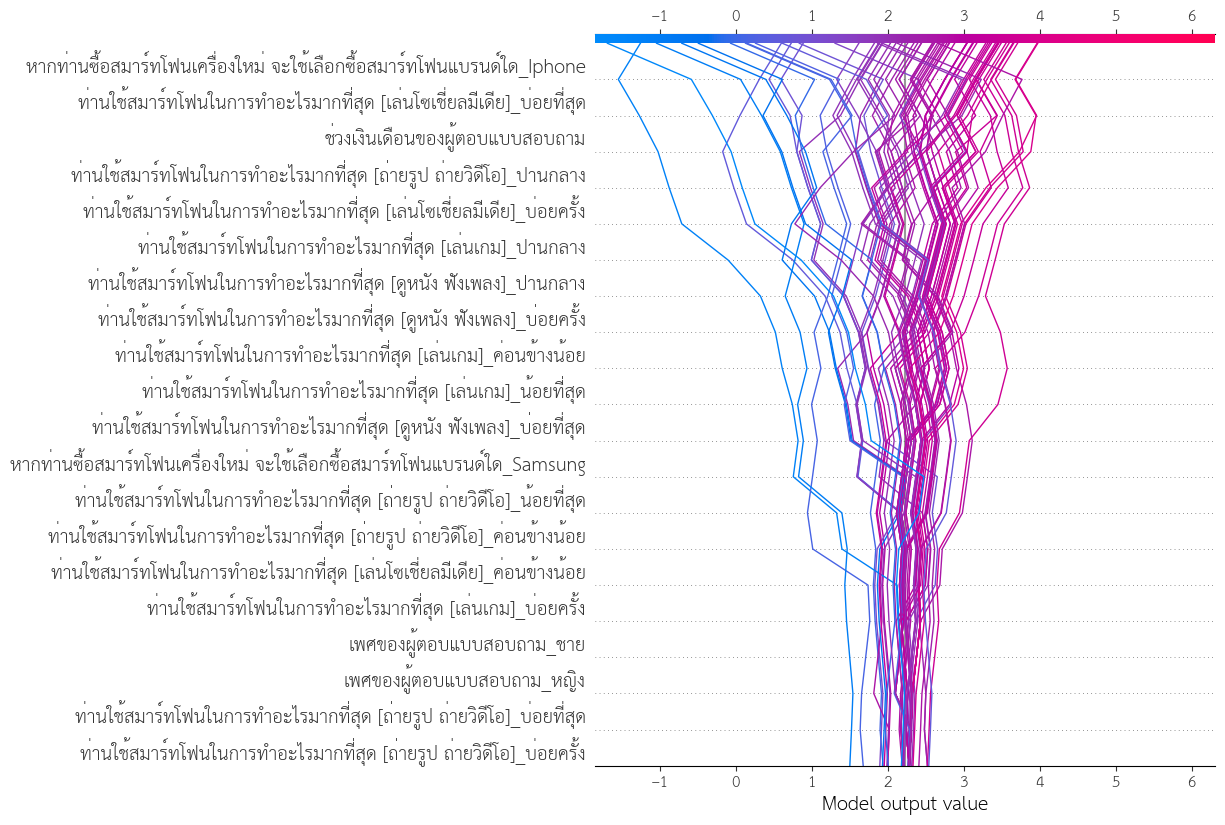

In [ ]:
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X),
                   feature_names = list(X.columns))